<a href="https://colab.research.google.com/github/gargvarunjec/Whatsapp-Chat-Analysis/blob/main/wp_chat_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji==1.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 8.0 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=aa5f48aab9c56ffcc4dc88783d496a92ab05139dbdf814b7c0b06b55f4c755af
  Stored in directory: /root/.cache/pip/wheels/5e/8c/80/c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji


In [ ]:
import regex
import pandas as pd
import numpy as np

import emoji

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [ ]:
def date_time(s):
    pattern='^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' #You have change the pattern so it was enable to find the pattern
    result=regex.match(pattern,s)
    if result:
        return True
    return False

def find_author(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False


def getdatapoint(line):
    splitline=line.split(" - ")
    datetime=splitline[0]
    date,time=datetime.split(", ")
    msg=" ".join(splitline[1:])

    if find_author(msg):
        splitmsg=msg.split(": ")
        author=splitmsg[0]
        msg=" ".join(splitmsg[1:])
    else:
        author=None
    return date,time,author,msg


In [ ]:
data=[]
convo='/content/WhatsApp Chat with Jatin.txt'

with open(convo,encoding="utf-8") as fp:
    fp.readline()
    msgbuffer=[]
    date=None
    Time=None
    Author=None
    # i=0
    while True:
        # i=i+1
        line=fp.readline()
        if not line:
            break
        line=line.strip()
        # print("1")
        if date_time(line):
            #print("1")
            if len(msgbuffer)>0:
                data.append([date,Time,Author,' '.join(msgbuffer)])
            msgbuffer.clear()
            date,Time,Author,msg=getdatapoint(line)

            msgbuffer.append(msg)
        else:
            msgbuffer.append(line)

In [ ]:
print (i)

NameError: ignored

In [ ]:
print(data)

df=pd.DataFrame(data,columns=["Date",'Time','Author','Message'])
df['Date']=pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

[['19/01/2021', '13:47', 'Jatin', 'Bhaiya computer Engineer'], ['19/01/2021', '13:55', 'Varun Garg', 'You deleted this message'], ['19/01/2021', '13:55', 'Varun Garg', 'Jatin'], ['19/01/2021', '13:55', 'Jatin', 'Aur kon ho sakta hai'], ['19/01/2021', '13:55', 'Varun Garg', 'Saale'], ['19/01/2021', '13:55', 'Varun Garg', 'Phone toh krta nhi hai'], ['19/01/2021', '13:55', 'Jatin', 'Kya delete kar diya'], ['19/01/2021', '13:55', 'Varun Garg', 'Kon'], ['19/01/2021', '13:56', 'Varun Garg', 'Delete kiya'], ['19/01/2021', '13:56', 'Varun Garg', 'Ye tera nya no. Hai kya'], ['19/01/2021', '13:56', 'Jatin', '😄'], ['19/01/2021', '13:56', 'Jatin', 'Yes'], ['19/01/2021', '13:56', 'Varun Garg', 'Tune phone bhi nya liya haikya'], ['19/01/2021', '14:00', 'Jatin', 'Yes'], ['19/01/2021', '14:02', 'Varun Garg', 'Konsa liya'], ['19/01/2021', '14:03', 'Varun Garg', 'Phone'], ['19/01/2021', '14:03', 'Jatin', 'Redmi note 9'], ['19/01/2021', '14:03', 'Varun Garg', '10k'], ['19/01/2021', '14:03', 'Varun Garg',

In [ ]:
df.style.set_properties(**{'text-align': 'right'})#we are doing some formating to print it beautifully
#https://stackoverflow.com/questions/69330607/formatting-pandas-dataframe-printing Reference

,Date,Time,Author,Message
0,2021-01-19 00:00:00,13:47,Jatin,Bhaiya computer Engineer
1,2021-01-19 00:00:00,13:55,Varun Garg,You deleted this message
2,2021-01-19 00:00:00,13:55,Varun Garg,Jatin
3,2021-01-19 00:00:00,13:55,Jatin,Aur kon ho sakta hai
4,2021-01-19 00:00:00,13:55,Varun Garg,Saale
5,2021-01-19 00:00:00,13:55,Varun Garg,Phone toh krta nhi hai
6,2021-01-19 00:00:00,13:55,Jatin,Kya delete kar diya
7,2021-01-19 00:00:00,13:55,Varun Garg,Kon
8,2021-01-19 00:00:00,13:56,Varun Garg,Delete kiya
9,2021-01-19 00:00:00,13:56,Varun Garg,Ye tera nya no. Hai kya


In [ ]:
total_messages=df.shape[0]
print(total_messages)

935


In [ ]:
def emoji_split(text):
  emoji_list=[]
  data=regex.findall(r'\X',text)
  for word in data:
    if any(char in emoji.UNICODE_EMOJI_ENGLISH for char in word):
      emoji_list.append(word)
  return emoji_list

df['emoji']=df["Message"].apply(emoji_split)

emoji=sum(df['emoji'].str.len())
print(emoji)

85


<ipython-input-10-bcefcb3eebf6>:5: DeprecationWarning: 'emoji.UNICODE_EMOJI_ENGLISH' is deprecated and will be removed in version 2.0.0. Use 'emoji.EMOJI_DATA' instead.
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  if any(char in emoji.UNICODE_EMOJI_ENGLISH for char in word):


In [ ]:
media_msg=df[df["Message"]=='<Media omitted>'].shape[0]
print(media_msg)

51


In [ ]:
url_pattern=r'(https?://\S+)'
df['url_count']=df.Message.apply(lambda x: regex.findall(url_pattern,x)).str.len()
links=np.sum(df.url_count)

print("Chats between Varun and Jatin")
print("Total Messages:",total_messages)
print("Total Number of media Shared:",media_msg)
print("Number of emoji shared:",emoji)
print("Total Number of links shared:",links)

Chats between Varun and Jatin
Total Messages: 935
Total Number of media Shared: 51
Number of emoji shared: 85
Total Number of links shared: 3


In [ ]:
media_messages_df=df[df["Message"]=='<Media omitted>'] #isme pehle tu vo rows nikalega jisme media tha
messages_df=df.drop(media_messages_df.index) # abb tu nya df lega jisme trko sirf messages prr kaam krrna h toh fir trko vo media wale rows nhi lene h isliye hmne drop ka istemaal kiya h

messages_df['Letter_count']=messages_df["Message"].apply(lambda s: len(s))
messages_df['Word count']=messages_df["Message"].apply(lambda s: len(s.split(' ')))
messages_df["Message_count"]=1

l=["Varun Garg","Jatin"]
for i in range(len(l)):
  req_df=messages_df[messages_df["Author"]==l[i]]

  print(f'Stats of {l[i]} -')
  print ('Messages sent',req_df.shape[0])

  words_per_message=(np.sum(req_df['Word count']))/req_df.shape[0]
  print('Average Words per Message',words_per_message)

  media=media_messages_df[media_messages_df['Author']==l[i]].shape[0]
  print('Media sent',media)

  emojis=sum(req_df['emoji'].str.len())
  print('Emoji sent',emojis)

  link=np.sum(req_df.url_count)
  print('Links sent',link)
  print('\n')

Stats of Varun Garg -
Messages sent 517
Average Words per Message 3.986460348162476
Media sent 26
Emoji sent 24
Links sent 0


Stats of Jatin -
Messages sent 364
Average Words per Message 4.928571428571429
Media sent 25
Emoji sent 61
Links sent 0




In [ ]:
total_emojis_list=list(set([a for b in messages_df.emoji for a in b]))

total_emojis=len(total_emojis_list)

total_emojis_list=list([a for b in messages_df.emoji for a in b])
emoji_dict=dict(Counter(total_emojis_list))
emoji_dict=sorted(emoji_dict.items(),key=lambda x: x[1],reverse=True)
for i in emoji_dict:
  print(i)


emoji_df=pd.DataFrame(emoji_dict,columns=['emoji','count'])
import plotly.express as px
fig=px.pie(emoji_df,values='count',names='emoji')
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

('😂', 38)
('😁', 6)
('😄', 3)
('😭', 3)
('😢', 3)
('😇', 2)
('🤞🏻', 2)
('🙏', 2)
('😴', 2)
('😀', 2)
('🤪', 2)
('🥳', 2)
('\U0001f972', 2)
('🤭', 2)
('😅', 2)
('😶', 1)
('😡', 1)
('😊', 1)
('😉', 1)
('😜', 1)
('🤦\u200d♂️', 1)
('🤣', 1)
('😳', 1)
('🙃', 1)
('😏', 1)
('👌🏻', 1)
('🤷\u200d♂️', 1)


There are 18143 words in all the messages.


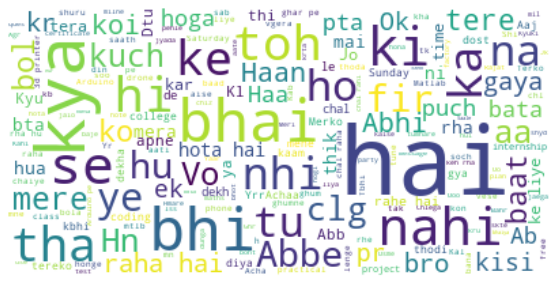

In [ ]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)


plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Varun Garg


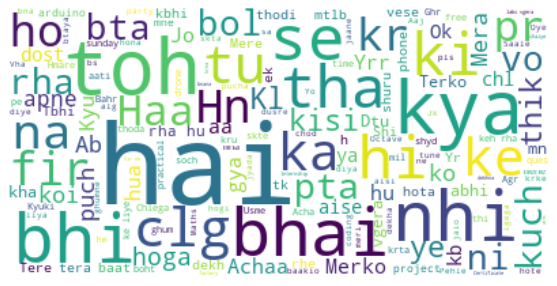

Author name Jatin


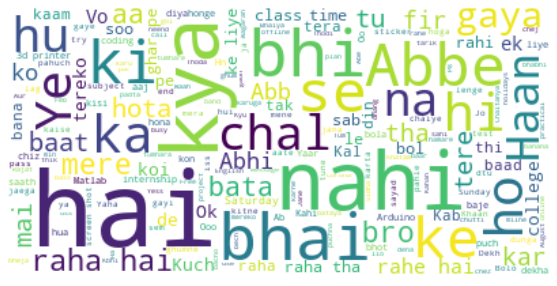

In [ ]:

l = ["Varun Garg", "Jatin"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)

  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()